In [112]:
# Import needed libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import datetime
import statsmodels.tsa.stattools as st
import plotly.express as px

In [113]:
# Load the data
heal_beaut = pd.read_csv(r'C:\Users\tmama\Box\BF_Midterm\health_beauty.csv')

heal_beaut.iloc[:5]

,order_purchase_timestamp,product_category_name_english,sales_volume,revenue
0,2017-01-06,health_beauty,1,636.00
1,2017-01-07,health_beauty,1,370.00
2,2017-01-09,health_beauty,1,109.90
3,2017-01-13,health_beauty,2,244.89
4,2017-01-15,health_beauty,1,349.90


In [114]:
# The index to be the date
heal_beaut['order_purchase_timestamp'] = pd.to_datetime(heal_beaut['order_purchase_timestamp'], format='%Y-%m-%d')
heal_beaut['year'] = heal_beaut['order_purchase_timestamp'].dt.year
heal_beaut['month'] = heal_beaut['order_purchase_timestamp'].dt.month
heal_beaut['weekday'] = heal_beaut['order_purchase_timestamp'].dt.weekday
heal_beaut['BlackFriday'] = np.where((heal_beaut['order_purchase_timestamp']=='2017-11-24') | (heal_beaut['order_purchase_timestamp'] == '2018-11-27'), True, False)
heal_beaut['Weekend'] = np.where((heal_beaut['weekday']== 5) | (heal_beaut['weekday'] == 6), True, False)



In [115]:
heal_beaut.head()

,order_purchase_timestamp,product_category_name_english,sales_volume,revenue,year,month,weekday,BlackFriday,Weekend
0,2017-01-06,health_beauty,1,636.00,2017,1,4,False,False
1,2017-01-07,health_beauty,1,370.00,2017,1,5,False,True
2,2017-01-09,health_beauty,1,109.90,2017,1,0,False,False
3,2017-01-13,health_beauty,2,244.89,2017,1,4,False,False
4,2017-01-15,health_beauty,1,349.90,2017,1,6,False,True


In [116]:
# Plot the data
px.line(heal_beaut, x='order_purchase_timestamp', y='sales_volume')

Figure(432x288)


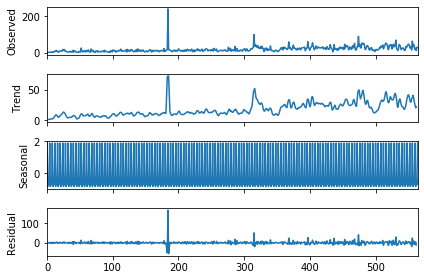

In [117]:
# Seasonal decomposition of sale
from statsmodels.tsa.seasonal import seasonal_decompose

dec = seasonal_decompose(heal_beaut['sales_volume'], model='additive', freq=4)
print(dec.plot())


In [118]:
#Split data into train and test
train = heal_beaut[:473]
test = heal_beaut[473:]
print(train.shape)
print(test.shape)
test.head()

(473, 9)
(92, 9)


,order_purchase_timestamp,product_category_name_english,sales_volume,revenue,year,month,weekday,BlackFriday,Weekend
473,2018-05-01,health_beauty,33,2956.04,2018,5,1,False,False
474,2018-05-02,health_beauty,89,7687.96,2018,5,2,False,False
475,2018-05-03,health_beauty,34,3665.79,2018,5,3,False,False
476,2018-05-04,health_beauty,45,5800.68,2018,5,4,False,False
477,2018-05-05,health_beauty,27,3908.23,2018,5,5,False,True


In [119]:
heal_beaut.tail()

,order_purchase_timestamp,product_category_name_english,sales_volume,revenue,year,month,weekday,BlackFriday,Weekend
560,2018-07-27,health_beauty,17,2723.02,2018,7,4,False,False
561,2018-07-28,health_beauty,24,6552.59,2018,7,5,False,True
562,2018-07-29,health_beauty,11,2110.69,2018,7,6,False,True
563,2018-07-30,health_beauty,29,4878.54,2018,7,0,False,False
564,2018-07-31,health_beauty,29,3752.48,2018,7,1,False,False


In [120]:
heal_beaut.iloc[473]

order_purchase_timestamp         2018-05-01 00:00:00
product_category_name_english          health_beauty
sales_volume                                      33
revenue                                      2956.04
year                                            2018
month                                              5
weekday                                            1
BlackFriday                                    False
Weekend                                        False
Name: 473, dtype: object

In [121]:
heal_beaut.tail()

,order_purchase_timestamp,product_category_name_english,sales_volume,revenue,year,month,weekday,BlackFriday,Weekend
560,2018-07-27,health_beauty,17,2723.02,2018,7,4,False,False
561,2018-07-28,health_beauty,24,6552.59,2018,7,5,False,True
562,2018-07-29,health_beauty,11,2110.69,2018,7,6,False,True
563,2018-07-30,health_beauty,29,4878.54,2018,7,0,False,False
564,2018-07-31,health_beauty,29,3752.48,2018,7,1,False,False


In [122]:
# Model building using train set
import statsmodels.api as sm

# fit model
model = sm.tsa.SARIMAX(train['sales_volume'], order = (1,0,1),
                      seasonal_order=(1,0,2,12))
modelFit = model.fit()

print(modelFit.summary())

C:\Users\tmama\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                 Statespace Model Results                                 
Dep. Variable:                       sales_volume   No. Observations:                  473
Model:             SARIMAX(1, 0, 1)x(1, 0, 2, 12)   Log Likelihood               -1897.396
Date:                            Fri, 16 Oct 2020   AIC                           3806.792
Time:                                    21:38:13   BIC                           3831.747
Sample:                                         0   HQIC                          3816.608
                                            - 473                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9980      0.007    150.466      0.000       0.985       1.011
ma.L1         -0.9139      0.025   

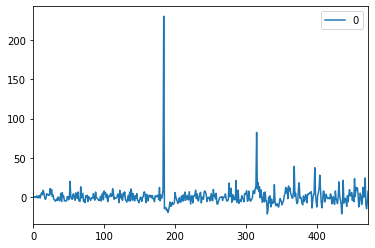

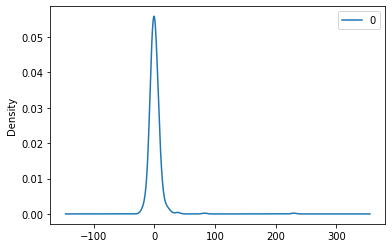

                0
count  473.000000
mean     0.959488
std     13.308265
min    -20.967996
25%     -4.313836
50%     -0.046733
75%      3.980775
max    230.016236


In [123]:
# plot residual errors
from pandas import DataFrame
from matplotlib import pyplot

residuals = DataFrame(modelFit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [124]:
fcst = modelFit.forecast(steps=len(test))
fcst

473    26.115177
474    26.046165
475    25.823641
476    25.810671
477    26.011970
478    25.788525
479    25.803200
480    25.987888
481    25.496996
482    25.379515
483    25.410544
484    25.429348
485    25.412723
486    25.383102
487    25.309641
488    25.241901
489    25.221166
490    25.155452
491    25.119320
492    25.021561
493    24.961429
494    24.923958
495    24.872128
496    24.703181
497    24.782945
498    24.754571
499    24.682399
500    24.615940
501    24.596435
502    24.531996
         ...    
535    22.889377
536    22.826581
537    22.810592
538    22.749796
539    22.718453
540    22.625720
541    22.570454
542    22.537750
543    22.490734
544    22.327059
545    22.411096
546    22.387416
547    22.320102
548    22.258470
549    22.243596
550    22.183957
551    22.153740
552    22.062192
553    22.008071
554    21.976488
555    21.930605
556    21.768176
557    21.853210
558    21.830633
559    21.764464
560    21.703968
561    21.690181
562    21.6316

In [ ]:
# Comuting MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test['sales_volume'], fcst[0])
MSE
print(test)

In [ ]:
# plotting actual test set
px.line(test, y=['sales_volume', fcst])

In [ ]:
# plotting actual test set against predicted
px.line(test, y=['sales_volume', fcst])